# Examine raw fingerprints

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = {}
with open('../combind_sherlock/bpp_outputs/fps.csv') as fp:
    fp.readline()
    for line in fp:
        try:
            (protein, struct, ligand, rank, gscore, emodel,
             rmsd, finger) = line.strip().split('\t')
            if protein not in data: data[protein] = {}
            if ligand not in data[protein]: data[protein][ligand] = {}
            finger = {(int(interaction), residue): float(score)
                      for interaction, residue, score in \
                      map(lambda x: x.split(','), finger.split(';'))}
            gscore, emodel, rmsd = float(gscore), float(emodel), float(rmsd)
            rank = int(rank)
            data[protein][ligand][rank] = (gscore, emodel, rmsd, finger)
        except:
            pass

IOError: [Errno 2] No such file or directory: '../combind_sherlock/bpp_outputs/fps.csv'

In [38]:
features = {
    'hbond':[2,3],
    #'sb1':[0],
    'sb2':[1],
    #'sb3':[4],
    'pipi':[6],
    'picat':[7,8],
    'contact':[11]
}

# Number of each interaction type

In [104]:
for feature, codes in features.items():
    counts = []
    for protein, ligands in data.items():
        for ligand, poses in ligands.items():
            for rank, pose in poses.items():
                counts += [sum([code in codes
                                for (code, residue), score in pose[-1].items()
                                if score < .5])]
    counts = np.array(counts)
    for i in range(counts.max()+1):
        print feature, i, sum(counts == i) / float(len(counts))

sb2 0 0.959979715167
sb2 1 0.0378861513756
sb2 2 0.00211300342307
sb2 3 2.11300342307e-05
picat 0 0.808688670076
picat 1 0.177978278325
picat 2 0.0127625406753
picat 3 0.000549380889997
picat 4 2.11300342307e-05
contact 0 0.0942188226345
contact 1 0.233803828762
contact 2 0.262096944597
contact 3 0.210793221485
contact 4 0.11632083844
contact 5 0.0536491569116
contact 6 0.0206863035118
contact 7 0.00559945907112
contact 8 0.00162701263576
contact 9 0.000802941300765
contact 10 0.000380340616152
contact 11 2.11300342307e-05
pipi 0 0.660862950598
pipi 1 0.299454845117
pipi 2 0.0379072814098
pipi 3 0.00175379284114
pipi 4 2.11300342307e-05
hbond 0 0.673900181718
hbond 1 0.263935257575
hbond 2 0.0536068968432
hbond 3 0.00790263280227
hbond 4 0.000570510924228
hbond 5 8.45201369226e-05


# Any Correlation with correctness?

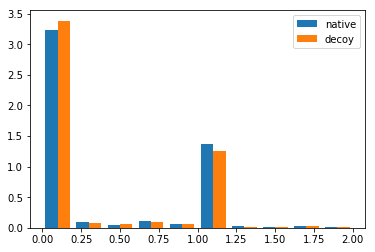

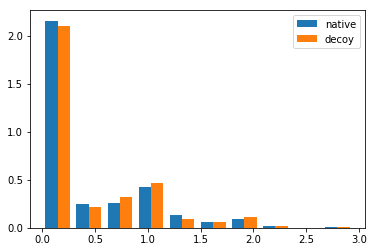

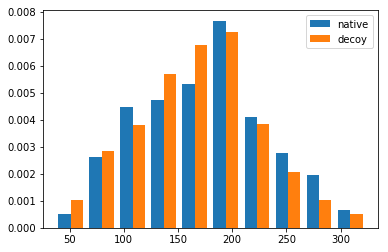

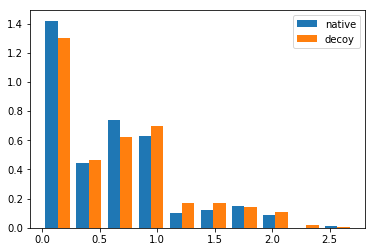

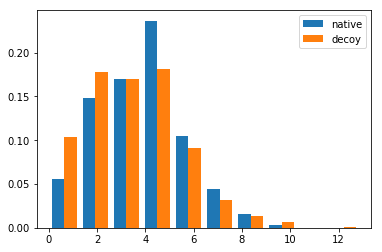

In [100]:
from sklearn.metrics import roc_auc_score


for feature, codes in features.items():
    native, decoy = [], []
    for protein, ligands in data.items():
        for ligand, poses in ligands.items():
            for rank, pose in poses.items():
                if rank > 1: continue
                count = sum([score for (code, residue), score in pose[-1].items() if code in codes])
                if pose[2] < 2:
                    native += [count]
                decoy += [count]
    plt.hist([native, decoy], label = ['native', 'decoy'], normed = True)
    plt.legend()
    plt.show()

sb2
0.5 0.575432329772


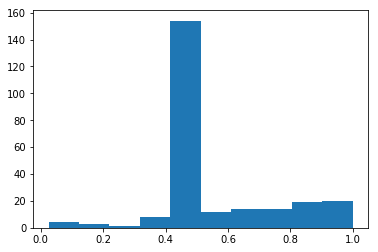

picat
0.5 0.464714841868


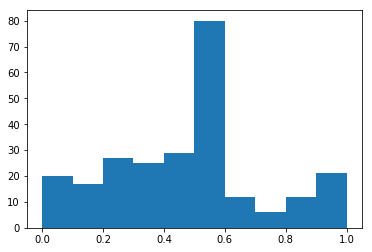

contact
0.65 0.609781046989


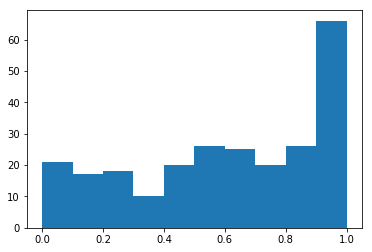

pipi
0.5 0.520557245573


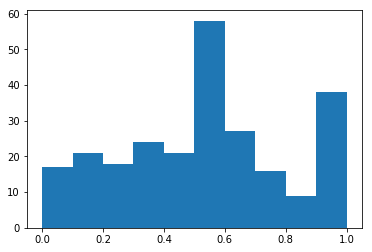

hbond
0.65 0.625590304878


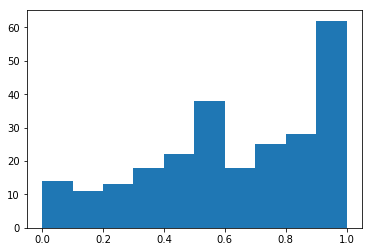

In [106]:
from sklearn.metrics import roc_auc_score

for feature, codes in features.items():
    auc = []
    for protein, ligands in data.items():
        for ligand, poses in ligands.items():
            y = []
            y_hat = []
            weights = []
            for rank, pose in poses.items():
                if rank > 20: continue
                y += [pose[2] < 2]
                y_hat += [sum([score for (code, residue), score in pose[-1].items() if code in codes])]

                #weights += [np.exp(-pose[0])]
            if sum(label == 1 for label in y) and sum(label == 0 for label in y):
                auc += [roc_auc_score(y, y_hat)]
    print feature
    print np.median(auc), np.mean(auc)
    plt.hist(auc)
    plt.show()

In [105]:
from sklearn.metrics import roc_auc_score

for feature, codes in features.items():
    y = []
    y_hat = []
    weights = []
    for protein, ligands in data.items():
        for ligand, poses in ligands.items():

            for rank, pose in poses.items():
                if rank > 1: continue
                y += [pose[2] < 2]
                y_hat += [sum([score for (code, residue), score in pose[-1].items() if code in codes])]
    print feature
    print roc_auc_score(y, y_hat)

sb2
0.532095344977
picat
0.474587532051
contact
0.571504835831
pipi
0.437217974796
hbond
0.620449603703
